# Quantum System Simulation

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.constants import hbar, physical_constants
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from quantum_classes import *
from pauli_matrices import *

## Rabi Oscillations

In [2]:
natural_freq = 18 * 10**9
driving_freq = 18 * 10**9
rabi_freq = 5 * 10**6
hamiltonian = Quantum_Hamiltonian(rabi_freq, 1, np.array([natural_freq]))
system = Quantum_System(hamiltonian, 1)

# Points at which to evaluate the solution
initial_state = np.array([1 + 0j, 0 + 0j])
t, y = system.evolve_state(initial_state, 10**-6, 1000, ham_type='rwa', driving_freq= driving_freq)

# Convert time to microseconds
t_micro = t * 10**6

effective_rabi = (rabi_freq**2 + (natural_freq - driving_freq)**2)**(1/2)
analytic_solution = 1 - 2 * (rabi_freq**2 / effective_rabi**2) * np.sin(2 * np.pi * effective_rabi * t / 2)**2 

# Calculate the z expectation value and take the real part
z_expectation = np.real(calculate_z_expectation(y))



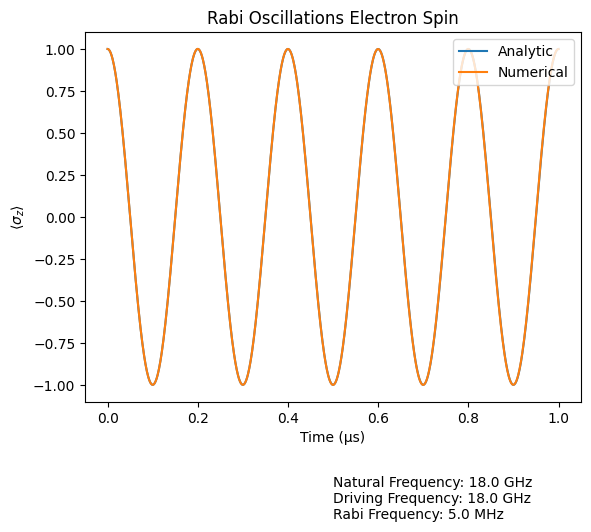

In [3]:
plt.plot(t_micro, analytic_solution, label='Analytic')
plt.plot(t_micro, z_expectation, label='Numerical')
plt.xlabel('Time (µs)')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.title('Rabi Oscillations Electron Spin')
plt.legend(loc='upper right')

# Add metadata/caption with relevant frequencies
metadata = (f"Natural Frequency: {natural_freq / 1e9} GHz\n"
            f"Driving Frequency: {driving_freq / 1e9} GHz\n"
            f"Rabi Frequency: {rabi_freq / 1e6} MHz")

# Positioning the metadata in the top-left corner
plt.text(0.5, -0.2, metadata, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
# Save the figure with the caption
plt.show()


[0.00000000e+00 1.00100100e-09 2.00200200e-09 3.00300300e-09
 4.00400400e-09 5.00500501e-09 6.00600601e-09 7.00700701e-09
 8.00800801e-09 9.00900901e-09 1.00100100e-08 1.10110110e-08
 1.20120120e-08 1.30130130e-08 1.40140140e-08 1.50150150e-08
 1.60160160e-08 1.70170170e-08 1.80180180e-08 1.90190190e-08
 2.00200200e-08 2.10210210e-08 2.20220220e-08 2.30230230e-08
 2.40240240e-08 2.50250250e-08 2.60260260e-08 2.70270270e-08
 2.80280280e-08 2.90290290e-08 3.00300300e-08 3.10310310e-08
 3.20320320e-08 3.30330330e-08 3.40340340e-08 3.50350350e-08
 3.60360360e-08 3.70370370e-08 3.80380380e-08 3.90390390e-08
 4.00400400e-08 4.10410410e-08 4.20420420e-08 4.30430430e-08
 4.40440440e-08 4.50450450e-08 4.60460460e-08 4.70470470e-08
 4.80480480e-08 4.90490490e-08 5.00500501e-08 5.10510511e-08
 5.20520521e-08 5.30530531e-08 5.40540541e-08 5.50550551e-08
 5.60560561e-08 5.70570571e-08 5.80580581e-08 5.90590591e-08
 6.00600601e-08 6.10610611e-08 6.20620621e-08 6.30630631e-08
 6.40640641e-08 6.506506

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


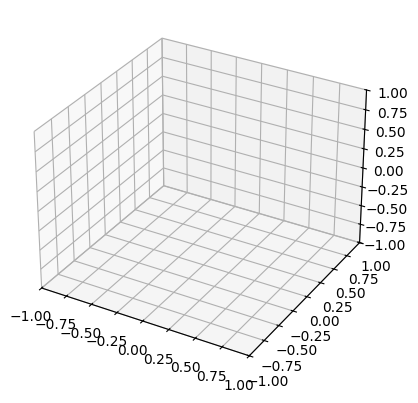

In [ ]:
# Visualize the solution on the Bloch sphere
system.visualise_solution(t, y)


## Rabi Chevrons

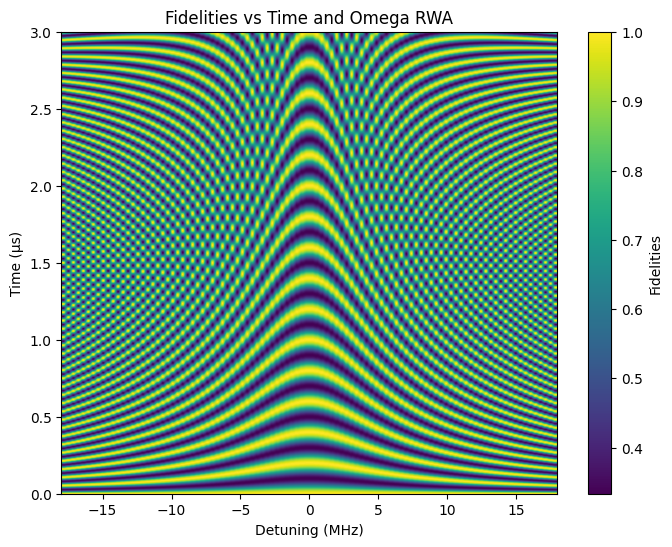

In [10]:
U_ideal = np.eye(2, 2)
driving_freq_array = np.linspace(natural_freq * 0.999, natural_freq * 1.001, 100)
freq_fids = []

for driving_freq in driving_freq_array:
    t, hamiltonians = system.find_total_hamiltonians(3 * 10**-6, 1000, ham_type='rwa', driving_freq=driving_freq)
    fidelities = calculate_fidelitys(U_ideal, hamiltonians, 2)
    freq_fids.append(fidelities)

# Convert time to microseconds
t_micro = t * 10**6

plt.figure(figsize=(8, 6))
plt.imshow(np.array(freq_fids).T, aspect="auto", 
           extent=[(driving_freq_array[0] - natural_freq) * 1e-6, (driving_freq_array[-1] - natural_freq) * 1e-6, t_micro[0], t_micro[-1]], 
           origin="lower", cmap="viridis")

# Add colorbar and labels
plt.colorbar(label="Fidelities")
plt.xlabel("Detuning (MHz)")
plt.ylabel("Time (µs)")
plt.title("Fidelities vs Time and Omega RWA")
plt.show()

## Multiple Qubits

In [12]:
driving_freq = 18 * 10**9
rabi_freq = 5 * 10**6
hamiltonian = Quantum_Hamiltonian(rabi_freq, 2, np.array([natural_freq, natural_freq]))
system = Quantum_System(hamiltonian, 2)

# Points at which to evaluate the solution
initial_state = np.array([1 + 0j, 0 + 0j, 0 + 0j, 0 + 0j])
t, y = system.evolve_state(initial_state, 10**-6, 1000, ham_type='rwa', driving_freq=driving_freq)

# Convert time to microseconds
t_micro = t * 10**6


# Calculate the z expectation value and take the real part
z_expectation_1 = []
z_expectation_2 = []

for state in y:
    z_expectation_1.append(state.conj().T @ np.kron(sigma_z, identity) @ state)
    z_expectation_2.append(state.conj().T @ np.kron(identity, sigma_z) @ state)


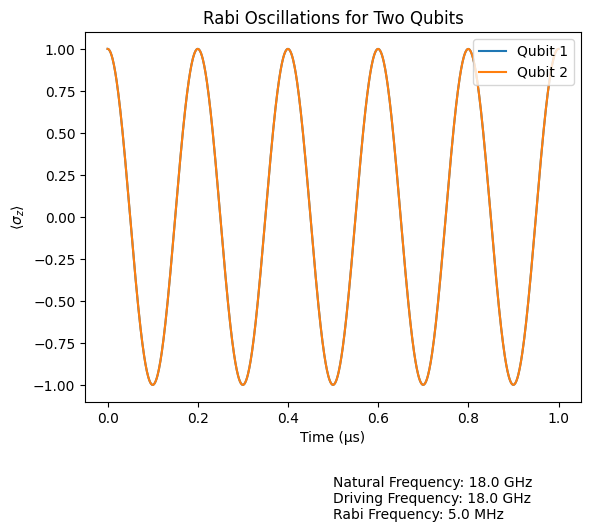

In [13]:
plt.plot(t_micro, np.real(z_expectation_1), label='Qubit 1')
plt.plot(t_micro, np.real(z_expectation_2), label='Qubit 2')
plt.xlabel('Time (µs)')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.title('Rabi Oscillations for Two Qubits')
plt.legend(loc='upper right')

# Add metadata/caption with relevant frequencies
metadata = (f"Natural Frequency: {natural_freq / 1e9} GHz\n"
            f"Driving Frequency: {driving_freq / 1e9} GHz\n"
            f"Rabi Frequency: {rabi_freq / 1e6} MHz")

# Positioning the metadata in the top-left corner
plt.text(0.5, -0.2, metadata, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
# Save the figure with the caption
plt.show()


# CCD

In [14]:
natural_freq = 18 * 10**9
driving_freq = 18 * 10**9
rabi_freq = 5 * 10**6
hamiltonian = Quantum_Hamiltonian(rabi_freq, 1, np.array([natural_freq]))
system = Quantum_System(hamiltonian, 1)



# Points at which to evaluate the solution
initial_state = np.array([1 + 0j, 0 + 0j])

# CCD parameters
phi_0, epsilon_m, phase_freq, theta_m = 0, 0, 2*10**6, 0, 

driving_omega = 2 * np.pi * driving_freq
t, y = system.evolve_state(initial_state, 10**-6, 1, ham_type='ccd_rwa', driving_freq=driving_freq, phi_0=phi_0, epsilon_m=epsilon_m, phase_freq=phase_freq, theta_m=theta_m)

# Convert time to microseconds
t_micro = t * 10**6
# Calculate the z expectation value and take the real part
z_expectation = np.real(calculate_z_expectation(y))


delta 0.0 cosphi0 1.0 sin_phio 0.0 cosphase 0.0
[[       0.        +0.j 15707963.26794897+0.j]
 [15707963.26794897+0.j        0.        +0.j]]
delta 0.0 cosphi0 1.0 sin_phio 0.0 cosphase 0.0
[[       0.        +0.j 15707963.26794897+0.j]
 [15707963.26794897+0.j        0.        +0.j]]
delta 0.0 cosphi0 1.0 sin_phio 0.0 cosphase 0.0
[[       0.        +0.j 15707963.26794897+0.j]
 [15707963.26794897+0.j        0.        +0.j]]
delta 0.0 cosphi0 1.0 sin_phio 0.0 cosphase 0.0
[[       0.        +0.j 15707963.26794897+0.j]
 [15707963.26794897+0.j        0.        +0.j]]
delta 0.0 cosphi0 1.0 sin_phio 0.0 cosphase 0.0
[[       0.        +0.j 15707963.26794897+0.j]
 [15707963.26794897+0.j        0.        +0.j]]
delta 0.0 cosphi0 1.0 sin_phio 0.0 cosphase 0.0
[[       0.        +0.j 15707963.26794897+0.j]
 [15707963.26794897+0.j        0.        +0.j]]
delta 0.0 cosphi0 1.0 sin_phio 0.0 cosphase 0.0
[[       0.        +0.j 15707963.26794897+0.j]
 [15707963.26794897+0.j        0.        +0.j]]

Want to be able to rotate to the first ccd frame.